In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

(132, 47, (47, 132), (6204,))

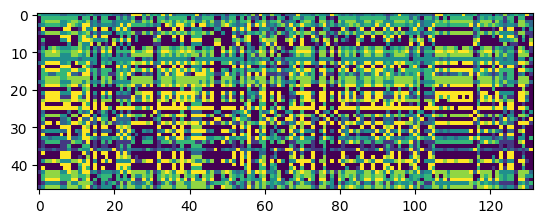

In [2]:
affinity = np.load('/scratch/src/reviewer-assignment/scores.npy')

n_rev = np.size(affinity, axis=0)
n_pap = np.size(affinity, axis=1)

a = affinity.flatten(order='C')
b = np.ones(a.shape[0])

plt.imshow(affinity)

n_pap, n_rev, affinity.shape, b.shape

In [3]:
Np = np.zeros((n_pap, n_pap*n_rev))
Nr = np.zeros((n_rev, n_pap*n_rev))

In [4]:
for pdx,p in enumerate(affinity.transpose()):
    for rdx,val in enumerate(p):
        if val > 0.:
            Np[pdx][rdx*n_pap + pdx] = 1
        
for rdx,r in enumerate(affinity):
    for pdx,val in enumerate(r):
        if val > 0.:
            Nr[rdx][rdx*n_pap + pdx] = 1

In [5]:
I = np.identity(n_pap*n_rev)
#K = np.vstack((Np, Nr, I, -I))
K = np.vstack((Np, Nr, -Nr, I, -I))
N = np.vstack((Np, Nr))

In [6]:
(I @ a ).shape, a.shape, K.shape

((6204,), (6204,), (12634, 6204))

In [7]:
cp = 4*np.ones(n_pap)
cr = 20*np.ones(n_rev)
crlb = -10*np.ones(n_rev)

c = np.concatenate((cp, cr))
#c = np.concatenate((cp, cr, crlb)) 

zeroes = np.zeros(I.shape[0])
ones = np.ones(I.shape[0])
d = np.concatenate((cp, cr, crlb, ones, zeroes))

In [8]:
assert (Np @ a).shape == cp.shape
assert (Nr @ a).shape == cr.shape
assert (N @ a).shape == c.shape

In [9]:
assert (I @ a).shape == ones.shape
assert (-I @ a).shape == zeroes.shape
-I @ a

array([-0.4, -0.3, -0.3, ..., -0.6, -0.3, -0.1])

In [10]:
res = scipy.optimize.linprog(-a, A_ub=K, b_ub=d, bounds=(0,1), options={'disp': True})#, integrality=3)
#res = scipy.optimize.linprog(-a, A_ub=N, b_ub=c, bounds=(0,1), options={'disp': True})#, integrality=3)

Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
226 rows, 4480 cols, 13440 nonzeros
179 rows, 4480 cols, 8960 nonzeros
Presolve : Reductions: rows 179(-12455); columns 4480(-1724); elements 8960(-16888)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
       1262    -2.9280000000e+02 Pr: 0(0); Du: 0(8.88178e-16) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 1262
Objective value     : -2.9280000000e+02
HiGHS run time      :          0.03


(        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
         success: True
          status: 0
             fun: -292.7999999999996
               x: [ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
             nit: 1262
           lower:  residual: [ 1.000e+00  0.000e+00 ...  0.000e+00
                               0.000e+00]
                  marginals: [ 0.000e+00  3.000e-01 ...  2.000e-01
                               3.000e-01]
           upper:  residual: [ 0.000e+00  1.000e+00 ...  1.000e+00
                               1.000e+00]
                  marginals: [-2.000e-01  0.000e+00 ...  0.000e+00
                               0.000e+00]
           eqlin:  residual: []
                  marginals: []
         ineqlin:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                               0.000e+00]
                  marginals: [-2.000e-01 -6.000e-01 ... -0.000e+00
                              -0.000e+00]
  mip_node_count: 0
  mip_dua

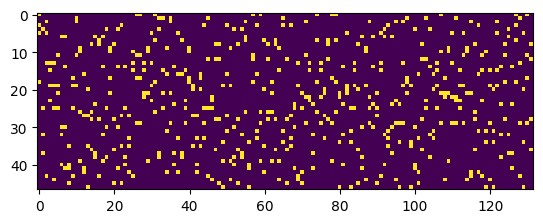

In [11]:
B=res.x.reshape(affinity.shape)
plt.imshow(B)
res, B.sum(axis=1), B.sum(axis=0)

In [12]:
#plt.plot(res.x)
np.max(res.x), res.x[0:47], np.where(res.x==1)[0].shape, np.where(res.x==0)[0].shape, np.where(res.x==1)[0].shape[0] + np.where(res.x==0)[0].shape[0], res.x.shape

(1.0,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (528,),
 (5676,),
 6204,
 (6204,))

In [13]:
#a[133:266] #np.count_nonzero(res.ineqlin.residual), res.ineqlin.residual